In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
np.random.seed(42)


# Jupyter visualization settings
%config InlineBackend.figure_format = 'retina'
plt.rcParams['axes.unicode_minus'] = False
sns.set_style("whitegrid")

In [2]:
# load iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
iris_df['species'] = iris.target
iris_df['species'] = iris_df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
iris_df = iris_df[['sepal_length', 'species']]
iris_df.head(2)

,sepal_length,species
0,5.1,setosa
1,4.9,setosa


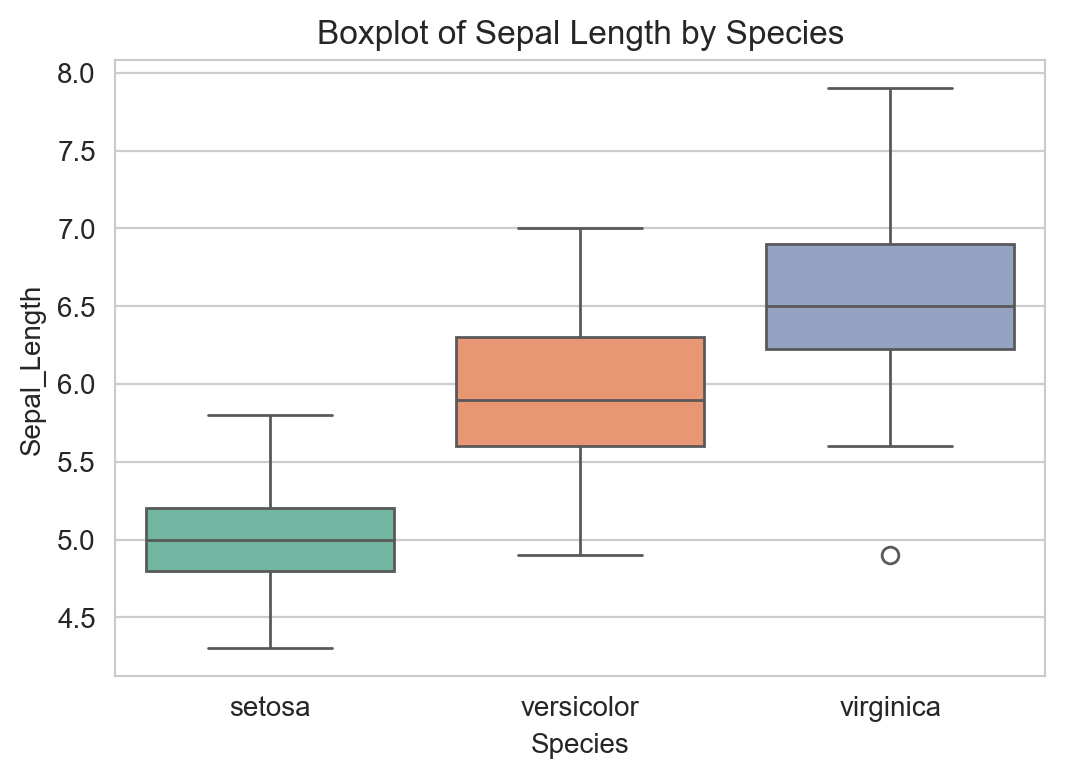

In [3]:
# visualize the data
plt.figure(figsize=(6, 4))
sns.boxplot(x='species', y='sepal_length',
            data=iris_df, hue='species', palette='Set2') # hue and palette: color by species
plt.title('Boxplot of Sepal Length by Species')
plt.xlabel('Species')
plt.ylabel('Sepal_Length')
plt.show()

In [4]:
# perform one-way ANOVA
model = ols('sepal_length ~ C(species)', data=iris_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

               sum_sq     df           F        PR(>F)
C(species)  63.212133    2.0  119.264502  1.669669e-31
Residual    38.956200  147.0         NaN           NaN


In [5]:
# interpret results
alpha = 0.05
p_value = anova_table['PR(>F)'].values[0]
if p_value < alpha:
    print(f'Reject the null hypothesis (p-value: {p_value:.4f}). There is a significant difference in sepal length among species.')
else:
    print(f'Fail to reject the null hypothesis (p-value: {p_value:.4f}). No significant difference in sepal length among species.')

Reject the null hypothesis (p-value: 0.0000). There is a significant difference in sepal length among species.
